In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np

In [65]:
# Import weatherdf from csv file
weatherdf=pd.read_csv('SMHI_Dataset\SMHI_Data.csv')
weatherdf.head()

,Datum,Tid (UTC),Lufttemperatur
0,2010-03-01,00:00:00,2.0
1,2010-03-01,01:00:00,NaN
2,2010-03-01,02:00:00,2.2
3,2010-03-01,03:00:00,1.7
4,2010-03-01,04:00:00,1.7


# Questions of E

# Q1

Explain the data cleaning steps you consider for analyzing the provided dataset. You must motivate and describe why, how, and in which order you are going to apply the selected steps to the dataset. 

Check missing values
The first step is to check for missing values in the dataset. Missing values can lead to incorrect or misleading results while preforming a data analysis. 

Duplicates
Duplicate entries can lead to an incorrect data analysis. If there are two rows with the same date and time it can cause confusion. 

Check outliers

Check consistency
Looking at the dataset it does lack consistancy in some places. Some days data is recorded every hour while other days only a few hours were recorded. This means that the dataset does not have consistancy. 

Impute missing values
We consider using imputation by interpolation to clean our data. The steps

In [66]:
# Code

# Q2

Does the dataset contain any missing values? If so, how many in both absolute terms and percentages? Reflect on the number of missing values. Do you regard it as much, or not?

There are missing values in the dataset there are two types of missing values in this dataset. As we discussed before the dataset is not consistant which means there are missing data for some timeslots. There is also missing recorded tempatures for some timeslots. 

In [67]:
missingValues = weatherdf['Lufttemperatur'].isna().sum()

print('Number of missing values in Lufttemperatur: ', missingValues)

Number of missing values in Lufttemperatur:  6713


Impute data

In [68]:

weatherdf['Datumtid'] = pd.to_datetime(weatherdf['Datum'] + ' ' + weatherdf['Tid (UTC)'])

# Sort the DataFrame by date
weatherdf = weatherdf.sort_values(by='Datumtid')

weatherdf['Lufttemperatur'].replace(' ', np.nan, inplace=True)

# Interpolate missing values using linear interpolation
weatherdf['Lufttemperatur'] = pd.to_numeric(weatherdf['Lufttemperatur'])
weatherdf['Lufttemperatur'].interpolate(method='linear', inplace=True)

# Save the imputed data to a new csv file
weatherdf.to_csv('imputedDataset.csv', index=False)

# Q3

Which strategy was used for handling the missing values? Motivate why you consider the selected strategy the most suitable for this task.

In [69]:
# Code

# Q4

Calculate the following statistics for the air temperature values in the
dataset:

#### Minimum value

In [70]:
weatherMindf = weatherdf.sort_values(by='Lufttemperatur', ascending=True)
weatherMindf.head()

,Datum,Tid (UTC),Lufttemperatur,Datumtid
17017,2012-02-04,03:00:00,-19.2,2012-02-04 03:00:00
17018,2012-02-04,04:00:00,-19.0,2012-02-04 04:00:00
7032,2010-12-21,20:00:00,-18.9,2010-12-21 20:00:00
8582,2011-02-23,05:00:00,-18.6,2011-02-23 05:00:00
7043,2010-12-22,07:00:00,-18.3,2010-12-22 07:00:00


#### Maximum value

In [71]:
weatherMaxdf = weatherdf.sort_values(by='Lufttemperatur', ascending=False)
weatherMaxdf.head()

,Datum,Tid (UTC),Lufttemperatur,Datumtid
74345,2018-07-16,11:00:00,39.6,2018-07-16 11:00:00
39164,2014-07-30,12:00:00,39.4,2014-07-30 12:00:00
56103,2016-06-25,12:00:00,39.0,2016-06-25 12:00:00
74368,2018-07-17,10:00:00,38.6,2018-07-17 10:00:00
74739,2018-08-01,15:00:00,38.2,2018-08-01 15:00:00


#### Sample mean

In [72]:
sampleMean = weatherdf['Lufttemperatur'].mean()
sampleMean

9.431193795457139

#### Q1/Q2/Q3 quartiles

In [73]:
weatherdf['Lufttemperatur'].quantile([0.25, 0.5, 0.75])


0.25     4.1
0.50     9.1
0.75    15.2
Name: Lufttemperatur, dtype: float64

#### Sample standard deviation

In [74]:
sampleMean = weatherdf['Lufttemperatur'].std()
sampleMean

6.9963708078332

#### 95% confidence interval of the mean

In [75]:
weatherTempdf = weatherdf['Lufttemperatur']

n = len(weatherTempdf)

stdError = weatherTempdf.std() / (n**0.5)

t.interval(0.95, n - 1, loc=sampleMean, scale=stdError)

(6.955753672457788, 7.036987943208612)

# Q5

Plot all available air temperature weatherdf as a line plot with dates on the x-axis.

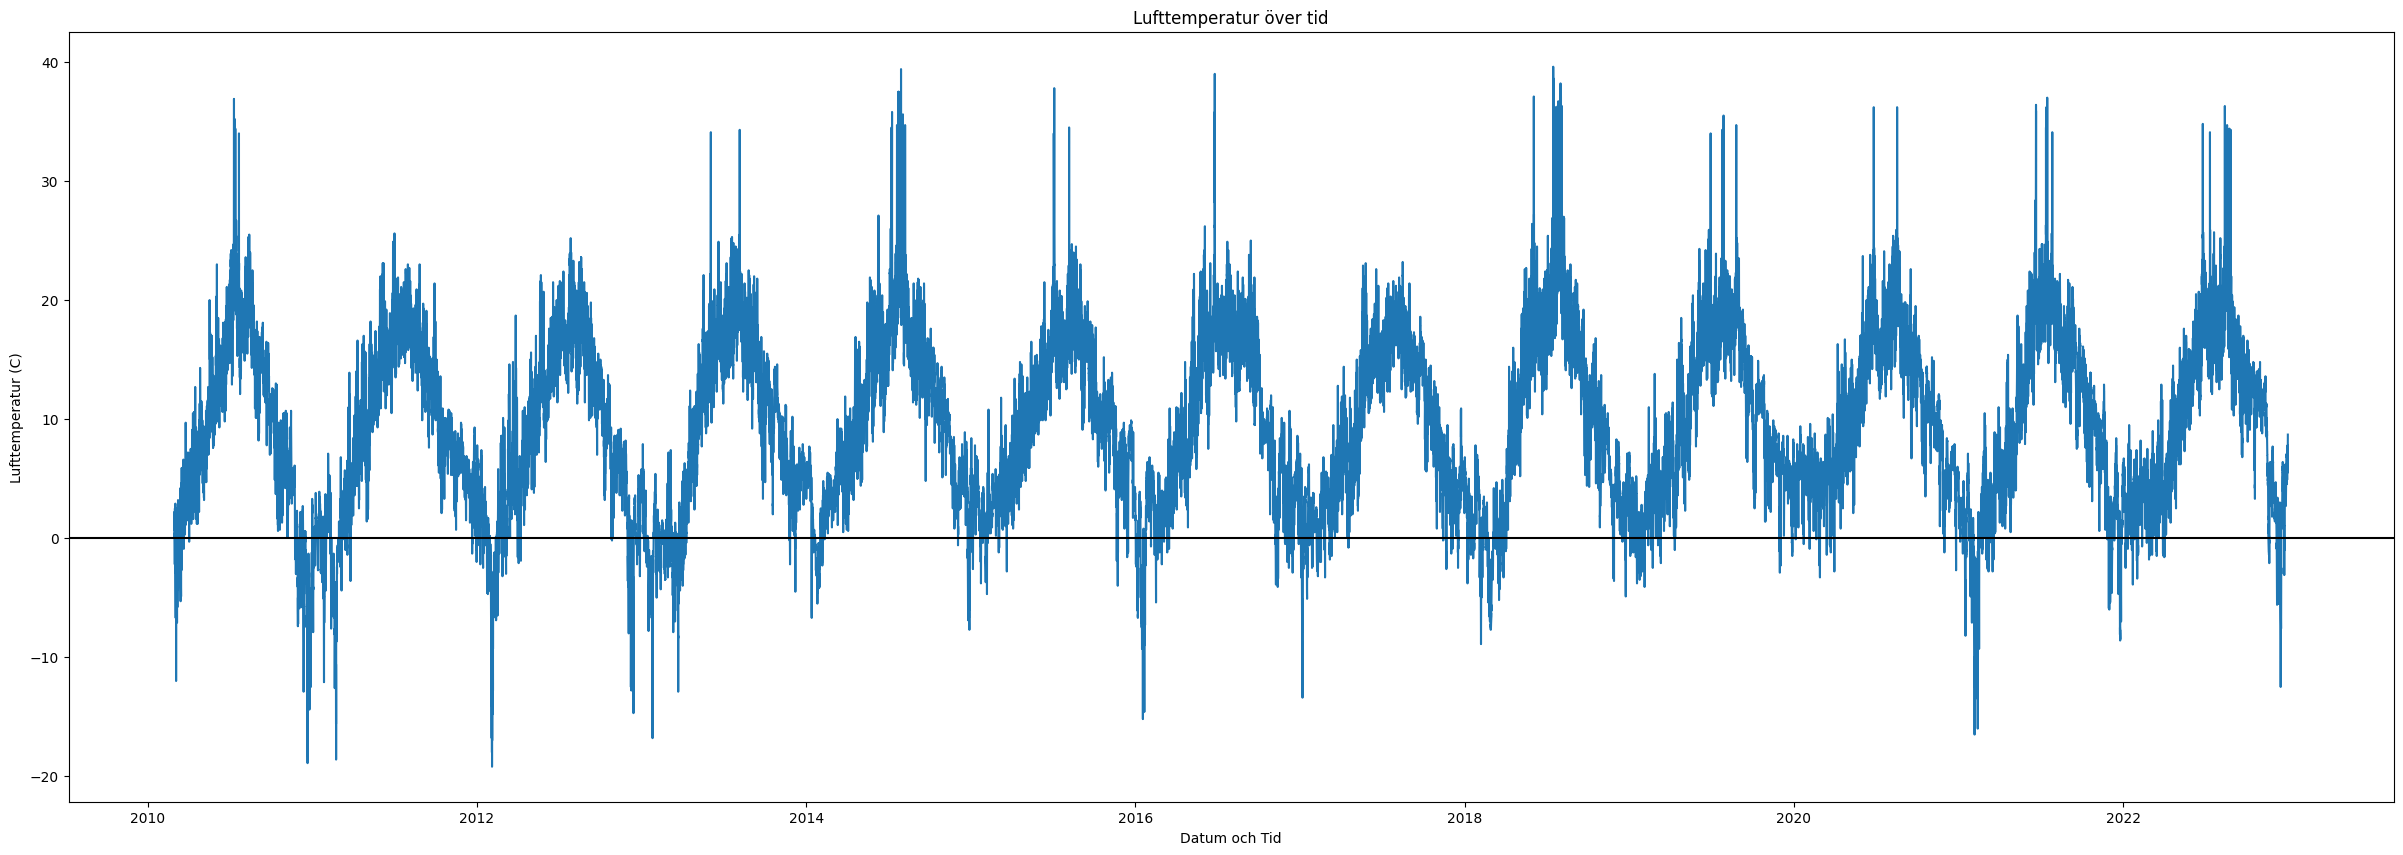

In [76]:
weatherdf['Datumtid'] = pd.to_datetime(weatherdf['Datum'] + ' ' + weatherdf['Tid (UTC)'])

plt.figure(figsize=(30,10))

plt.plot(weatherdf['Datumtid'], weatherdf['Lufttemperatur'])

plt.axhline(y=0, color='black', linestyle='-')

plt.xlabel('Datum och Tid')
plt.ylabel('Lufttemperatur (C)')
plt.title('Lufttemperatur över tid')

plt.show()

# Q6

Rank the overall temperature per month, sort from the coldest to the warmest. List the top ten (10) coldest months in the dataset. Format the output as: YEAR/Month: temp, e.g.“2010/January: -5.0”

In [77]:

weatherdf['Datumtid'] = pd.to_datetime(weatherdf['Datum'] + ' ' + weatherdf['Tid (UTC)'])
weatherdf['År'] = weatherdf['Datumtid'].dt.year
weatherdf['Månad'] = weatherdf['Datumtid'].dt.month_name()

# Average temperature per month
monthlyTemperatures = weatherdf.groupby(['År', 'Månad'])['Lufttemperatur'].mean().reset_index()

# Sort the average temperature values in ascending order to get the coldest months
coldestMonths = monthlyTemperatures.sort_values(by='Lufttemperatur').head(10)

# Top ten coldest months
for i, row in coldestMonths.iterrows():
    print(f"{row['År']}/{row['Månad']}: {row['Lufttemperatur']:.1f}")


2010/December: -3.8
2011/February: -1.5
2012/February: -1.5
2021/February: -1.0
2016/January: -0.9
2018/February: -0.9
2013/March: -0.8
2013/January: -0.6
2012/December: -0.6
2011/January: -0.4


# Q7

Text

In [78]:
# Code

# Q8

Text

In [79]:
# Code

# Q9

Text

In [80]:
# Code

# Q10

Text

In [81]:
# Code

# Q11

Text

In [82]:
# Code